In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns

In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

### Dealing with fake ids 

In [9]:
fake_ids = np.load('../data/synthetic_samples_indexes.npy')

In [50]:
y = train.target
train.drop(['target'], inplace=True, axis=1)

In [26]:
good_test = test.loc[~test.index.isin(fake_ids)]

In [96]:
real = train.var_81.map(train.var_81.value_counts())
itwas = test.var_81.map(test.var_81.value_counts())
itis = test.var_81.map(good_test.var_81.value_counts())

In [97]:
print(real[:20].values)
print(itwas[:20].values)
print(itis[:20].values)

[ 4  1  3  1  1 11  2  3  5  1  5  5  1  3  3  4  1  3  4  1]
[ 6  2  3  8  2 14  4  4  9  4  4  3  7  5  7  2  2  2 11  2]
[3 1 1 3 1 6 1 2 3 3 1 1 4 3 2 1 2 1 5 1]


### Other observations 

In [56]:
X = train[train.columns[2:]].values
y = train.target

In [34]:
X_tr_neg = train.loc[train.target == 0, train.columns[2:]].values
X_tr_pos = train.loc[train.target == 1, train.columns[2:]].values

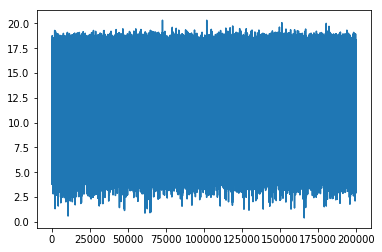

In [109]:
plt.plot(train.loc[train.target == 0, 'var_0'])

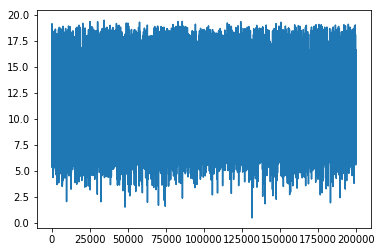

In [110]:
plt.plot(train.loc[train.target == 1, 'var_0'])

In [79]:
print ('min: ', train.loc[train.target == 0, 'var_0'].min())
print ('max: ', train.loc[train.target == 0, 'var_0'].max())
print ('5%: ', train.loc[train.target == 0, 'var_0'].quantile(0.05))
print ('95%: ', train.loc[train.target == 0, 'var_0'].quantile(0.95))

min:  0.4084
max:  20.315
5%:  5.967425
95%:  15.889494999999998


In [80]:
print ('min: ', train.loc[train.target == 1, 'var_0'].min())
print ('max: ', train.loc[train.target == 1, 'var_0'].max())
print ('5%: ', train.loc[train.target == 1, 'var_0'].quantile(0.05))
print ('95%: ', train.loc[train.target == 1, 'var_0'].quantile(0.95))

min:  0.4528
max:  19.4583
5%:  6.080184999999999
95%:  17.02842499999999


In [81]:
train[:10]

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
5,train_5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602
6,train_6,0,11.8091,-0.0832,9.3494,4.2916,11.1355,-8.0198,6.1961,12.0771,...,8.7830,6.4521,3.5325,0.1777,18.3314,0.5845,9.1104,9.1143,10.8869,-3.2097
7,train_7,0,13.5580,-7.9881,13.8776,7.5985,8.6543,0.8310,5.6890,22.3262,...,13.1700,6.5491,3.9906,5.8061,23.1407,-0.3776,4.2178,9.4237,8.6624,3.4806
8,train_8,0,16.1071,2.4426,13.9307,5.6327,8.8014,6.1630,4.4514,10.1854,...,1.4298,14.7510,1.6395,1.4181,14.8370,-1.9940,-1.0733,8.1975,19.5114,4.8453
9,train_9,0,12.5088,1.9743,8.8960,5.4508,13.6043,-16.2859,6.0637,16.8410,...,0.5543,6.3160,1.0371,3.6885,14.8344,0.4467,14.1287,7.9133,16.2375,14.2514


In [62]:
X[y == 0] * (-1)

array([[ -8.9255,   6.7863, -11.9081, ...,  -8.5635, -12.7803,   1.0914],
       [-11.5006,   4.1473, -13.8588, ...,  -8.7889, -18.356 ,  -1.9518],
       [ -8.6093,   2.7457, -12.0805, ...,  -8.2675, -14.7222,  -0.3965],
       ...,
       [-11.2232,   5.0518, -10.5127, ...,  -8.7155, -13.8329,  -4.1995],
       [ -9.7148,   8.6098, -13.6104, ..., -10.0342, -15.5289,  13.9001],
       [-10.8762,   5.7105, -12.1183, ...,  -8.1857, -12.1284,  -0.1385]])

In [82]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [84]:
X_scaled = sc.fit_transform(train[train.columns[2:]])

In [93]:
X_scaled[:, 195].mean()

4.1815439999481893e-17

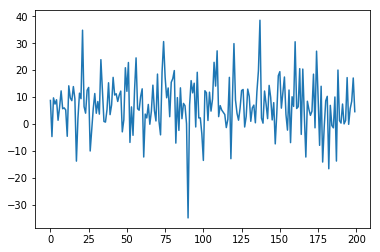

In [111]:
plt.plot(train.loc[12, train.columns[2:]].values)

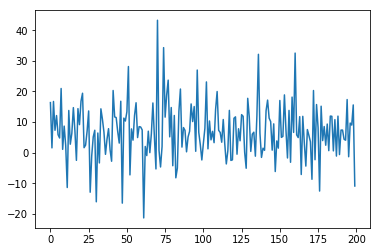

In [112]:
plt.plot(train.loc[13, train.columns[2:]].values)

(array([ 1.,  0.,  6.,  8., 37., 67., 51., 21.,  7.,  2.]),
 array([-34.7708, -27.4439, -20.117 , -12.7901,  -5.4632,   1.8637,
          9.1906,  16.5175,  23.8444,  31.1713,  38.4982]),
 <a list of 10 Patch objects>)

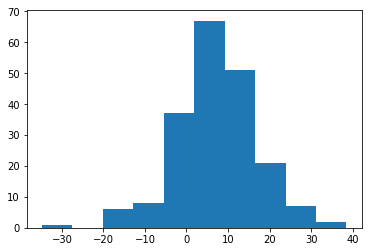

In [118]:
plt.hist(train.loc[12, train.columns[2:]].values.astype(np.float))

(array([ 3.,  5., 19., 51., 59., 45., 12.,  2.,  3.,  1.]),
 array([-21.2631, -14.8121,  -8.3611,  -1.9101,   4.5409,  10.9919,
         17.4429,  23.8939,  30.3449,  36.7959,  43.2469]),
 <a list of 10 Patch objects>)

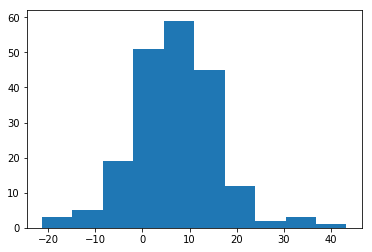

In [123]:
plt.hist(train.loc[13, train.columns[2:]].values.astype(np.float))

In [126]:
X_tr = train[train.columns[2:]].values.astype(np.float32)

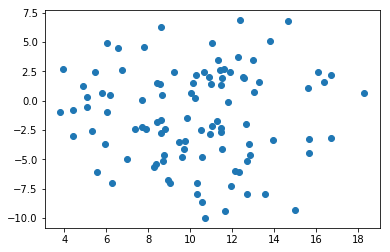

In [146]:
plt.scatter(X_tr[:100, 0], X_tr[:100, 1])

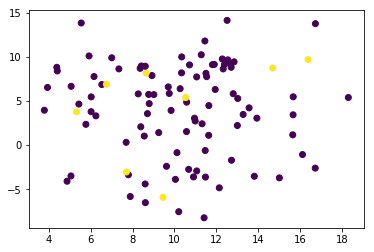

In [159]:
plt.scatter(train['var_0'][:100], train['var_196'][:100], alpha=1.0, c=y[:100])

In [165]:
train[train.target == 0][:10]

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
5,train_5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602
6,train_6,0,11.8091,-0.0832,9.3494,4.2916,11.1355,-8.0198,6.1961,12.0771,...,8.7830,6.4521,3.5325,0.1777,18.3314,0.5845,9.1104,9.1143,10.8869,-3.2097
7,train_7,0,13.5580,-7.9881,13.8776,7.5985,8.6543,0.8310,5.6890,22.3262,...,13.1700,6.5491,3.9906,5.8061,23.1407,-0.3776,4.2178,9.4237,8.6624,3.4806
8,train_8,0,16.1071,2.4426,13.9307,5.6327,8.8014,6.1630,4.4514,10.1854,...,1.4298,14.7510,1.6395,1.4181,14.8370,-1.9940,-1.0733,8.1975,19.5114,4.8453
9,train_9,0,12.5088,1.9743,8.8960,5.4508,13.6043,-16.2859,6.0637,16.8410,...,0.5543,6.3160,1.0371,3.6885,14.8344,0.4467,14.1287,7.9133,16.2375,14.2514


In [166]:
train[train.target == 1][:10]

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
13,train_13,1,16.3699,1.5934,16.7395,7.3330,12.1450,5.9004,4.8222,20.9729,...,7.4002,7.4031,4.3989,4.0978,17.3638,-1.3022,9.6846,9.0419,15.6064,-10.8529
29,train_29,1,5.3301,-2.6064,13.1913,3.1193,6.6483,-6.5659,5.9064,15.2341,...,5.9215,7.9676,2.3405,1.1482,23.2168,-2.0105,3.7600,9.4513,17.4105,-14.6897
63,train_63,1,7.7072,0.0183,9.9974,8.3524,9.2886,-13.3627,6.0425,10.1108,...,1.5832,5.0039,3.8814,7.4241,21.4844,-0.8297,-3.0468,7.5790,15.7685,5.4769
65,train_65,1,10.5358,-2.5439,8.7394,6.7548,14.4099,-3.8724,5.1584,15.8381,...,4.6648,6.4227,3.4025,-4.0882,14.1174,-0.2472,5.3847,8.6949,15.1340,3.8449
71,train_71,1,6.7547,2.5973,14.2141,8.3514,7.4942,-1.3055,4.2336,15.0243,...,1.4677,3.5935,2.0013,1.5777,18.2820,-4.3408,6.8869,9.3567,18.9013,13.3447
72,train_72,1,8.6470,0.4462,10.9808,10.1859,13.9121,-16.4645,5.2837,13.8396,...,6.6004,13.0969,2.2437,0.6260,23.4572,0.3117,8.1634,7.9248,10.5462,-17.8708
84,train_84,1,14.6825,6.7583,9.7766,9.9461,7.9207,-2.7174,5.4594,20.1579,...,4.3388,10.4738,2.3715,1.5612,18.8488,-1.2723,8.7246,7.7010,15.2861,9.8048
99,train_99,1,9.4554,-3.5377,8.1026,7.4557,12.8716,4.4526,4.1798,19.0480,...,11.4642,9.4043,2.4608,5.1603,21.9483,-0.9451,-5.9209,9.7453,16.3138,-14.8816
119,train_119,1,12.6769,-0.4517,6.7371,9.4245,12.7274,3.0585,5.7957,15.5797,...,1.6877,9.6047,0.7896,10.2968,20.0513,-0.9380,10.2037,7.7482,13.2917,-11.2830
120,train_120,1,7.6382,-6.3480,8.3145,7.6210,10.6435,-8.8025,7.1044,20.6761,...,-1.6585,13.7319,0.8665,10.6605,24.4835,0.1339,-4.0743,7.8159,19.4458,-19.9356


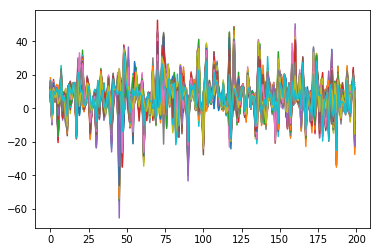

In [177]:
for i in range(100):
    plt.plot(train[train.target == 0][i:i+1][train.columns[2:]].values.reshape((-1, 1)))
#     plt.show()

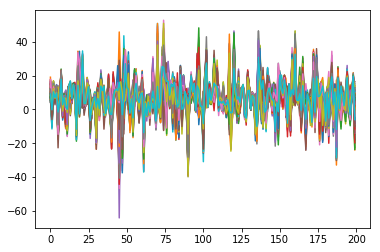

In [178]:
for i in range(100):
    plt.plot(train[train.target == 1][i:i+1][train.columns[2:]].values.reshape((-1, 1)))

In [408]:
train[y == 1].index.values

array([    13,     29,     63, ..., 199981, 199986, 199990])

In [411]:
train.groupby('var_81')['var_81'].transform('count')

0          4
1          1
2          3
3          1
4          1
5         11
6          2
7          3
8          5
9          1
10         5
11         5
12         1
13         3
14         3
15         4
16         1
17         3
18         4
19         1
20         5
21         3
22         4
23         2
24         3
25         5
26         4
27         7
28         2
29         5
          ..
199970     5
199971     4
199972     1
199973     1
199974     1
199975     2
199976     3
199977    10
199978     4
199979     3
199980     1
199981     2
199982     5
199983     5
199984     3
199985     1
199986     3
199987     2
199988     3
199989     5
199990     7
199991     2
199992     1
199993     5
199994     1
199995     5
199996     2
199997     5
199998     1
199999     5
Name: var_81, Length: 200000, dtype: int64